In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

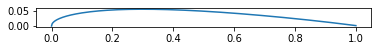

In [6]:
xs = np.linspace(0, 0.1, 50)
xs = np.append(xs, np.linspace(0.1, 1, 100))
NACA = [8., 4., 1., 1.]
t = (NACA[2]*10 + NACA[3])/100
yts = 5*t*(0.2969*np.sqrt(xs)-0.1260*xs-0.3516*np.square(xs)+0.2843*np.power(xs, 3)-0.1015*np.power(xs, 4))
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.set_aspect(1)
_ = ax.plot(xs, yts)

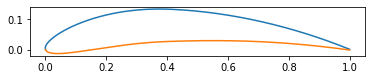

In [7]:
m = NACA[0]/100
p = NACA[1]/10
ycs = [m/p**2 * (2*p*x-x**2) if x <= p else m/(1-p)**2*((1-2*p)+2*p*x-x**2) for x in xs]
thetas = [np.arctan(2*m/p**2 * (p-x)) if x <= p else np.arctan(2*m/(1-p)**2*(p-x)) for x in xs]
xUs = xs - yts*np.sin(thetas)
yUs = ycs + yts*np.cos(thetas)
xLs = xs + yts*np.sin(thetas)
yLs = ycs - yts*np.cos(thetas)
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.set_aspect(1)
_ = ax.plot(xUs, yUs)
_ = ax.plot(xLs, yLs)

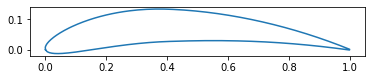

In [8]:
x_finals = np.append(xUs, xLs[-1::-1])
y_finals = np.append(yUs, yLs[-1::-1])
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.set_aspect(1)
_ = ax.plot(x_finals, y_finals)

In [12]:
air_foil = pd.DataFrame(data = np.array([x_finals, y_finals]).T, columns = ['x', 'y'])
filepath = "NACA8411.csv"
air_foil.to_csv(filepath, index = False)